I.Importing Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
 


I-l'importation des donnees : 

In [2]:
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv" , sep=';')

 I.1-concatination des donnees 

In [3]:
df = pd.concat([mat,por])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


 II-LA COMPREHENSION DES DONNES : 

II.1-check the distribution of data 

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


information : std presque dans tout les variables est tres faible ce qui montre que les donnees sont coherantes sans centre autour de la moyenne 

II.2 column_rename

In [5]:
headers = ["School","Sex","Age","Home_Address_Type","Family_Size","Parents_Cohabitation_Status","Mother_Eductaion","Father_Education","Mother_Job","Father_Job","Reason_Choosing_School","Guardien","Travel_Time","Revision_Time","Past_Class_Failures","Extra_Eductional_Support",
           "Family_Educational_Support","Extra_Paid_Classes","Extra_Activities","Attended_Nursery","Wants_Higher_Education","Internet_Access","Romantic_Relationship","Quality_Family_Relationship","Free_Time","Go_out","Day_Drugs_Consumption","Week_Drugs_Consumption","Health_Status",
           "Abscence","First_Periode_Grade","Seconde_Periode_Grade","Final_Periode_Grade"]
df.columns = headers

In [6]:
df.head()

,School,Sex,Age,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Eductaion,Father_Education,Mother_Job,Father_Job,...,Quality_Family_Relationship,Free_Time,Go_out,Day_Drugs_Consumption,Week_Drugs_Consumption,Health_Status,Abscence,First_Periode_Grade,Seconde_Periode_Grade,Final_Periode_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


II.3 verifier le nombre de valeurs unique de chaque variable : 

In [7]:
df.nunique()

School                          2
Sex                             2
Age                             8
Home_Address_Type               2
Family_Size                     2
Parents_Cohabitation_Status     2
Mother_Eductaion                5
Father_Education                5
Mother_Job                      5
Father_Job                      5
Reason_Choosing_School          4
Guardien                        3
Travel_Time                     4
Revision_Time                   4
Past_Class_Failures             4
Extra_Eductional_Support        2
Family_Educational_Support      2
Extra_Paid_Classes              2
Extra_Activities                2
Attended_Nursery                2
Wants_Higher_Education          2
Internet_Access                 2
Romantic_Relationship           2
Quality_Family_Relationship     5
Free_Time                       5
Go_out                          5
Day_Drugs_Consumption           5
Week_Drugs_Consumption          5
Health_Status                   5
Abscence      

information :  la plus part des variables contient deux valeures

II.4 breve resumer sur les donnees (dataType / le nombre de valeurs non manqunats )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       1044 non-null   object
 1   Sex                          1044 non-null   object
 2   Age                          1044 non-null   int64 
 3   Home_Address_Type            1044 non-null   object
 4   Family_Size                  1044 non-null   object
 5   Parents_Cohabitation_Status  1044 non-null   object
 6   Mother_Eductaion             1044 non-null   int64 
 7   Father_Education             1044 non-null   int64 
 8   Mother_Job                   1044 non-null   object
 9   Father_Job                   1044 non-null   object
 10  Reason_Choosing_School       1044 non-null   object
 11  Guardien                     1044 non-null   object
 12  Travel_Time                  1044 non-null   int64 
 13  Revision_Time                1044 non-n

II.5 verifier la qualites des donnees :
  II.5.1 verifier les  valeurs redondantes :

In [9]:
df.duplicated().sum()

0

pas de valeurs redondantes 

II.5.2 verifier la presance des  valeurs maquants : 

In [10]:
#df.replace('?',np.nan,inplace=True)
df.isna().sum()

School                         0
Sex                            0
Age                            0
Home_Address_Type              0
Family_Size                    0
Parents_Cohabitation_Status    0
Mother_Eductaion               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_Choosing_School         0
Guardien                       0
Travel_Time                    0
Revision_Time                  0
Past_Class_Failures            0
Extra_Eductional_Support       0
Family_Educational_Support     0
Extra_Paid_Classes             0
Extra_Activities               0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
Romantic_Relationship          0
Quality_Family_Relationship    0
Free_Time                      0
Go_out                         0
Day_Drugs_Consumption          0
Week_Drugs_Consumption         0
Health_Status                  0
Abscence                       0
First_Peri

II.5.3 verifier le type des variables 

In [55]:
df.dtypes

School                         object
Sex                            object
Age                             int64
Home_Address_Type              object
Family_Size                    object
Parents_Cohabitation_Status    object
Mother_Eductaion                int64
Father_Education                int64
Mother_Job                     object
Father_Job                     object
Reason_Choosing_School         object
Guardien                       object
Travel_Time                     int64
Revision_Time                   int64
Past_Class_Failures             int64
Extra_Eductional_Support       object
Family_Educational_Support     object
Extra_Paid_Classes             object
Extra_Activities               object
Attended_Nursery               object
Wants_Higher_Education         object
Internet_Access                object
Romantic_Relationship          object
Quality_Family_Relationship     int64
Free_Time                       int64
Go_out                          int64
Day_Drugs_Co

II.5.4 verrifier la presance des valeures aburrantes :

<Axes: xlabel='First_Periode_Grade'>

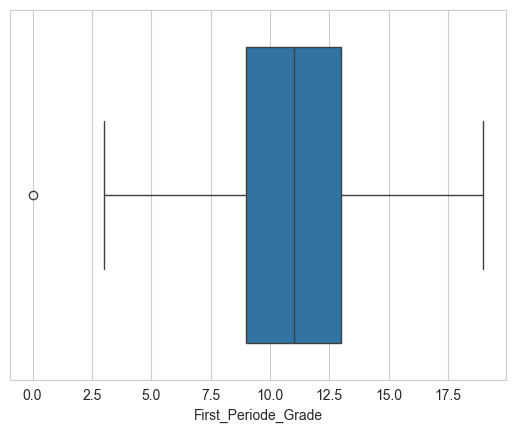

In [56]:
sns.boxplot(x=df['First_Periode_Grade'])

<Axes: xlabel='Abscence'>

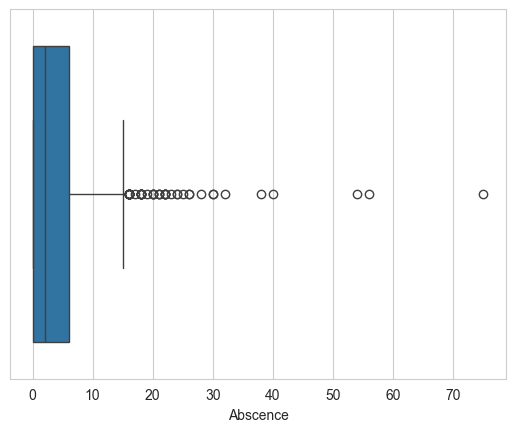

In [57]:
sns.boxplot(x=df['Abscence'])

In [64]:
upper_limit = df['Abscence'].quantile(.95)
df_outliers=df[df['Abscence']>upper_limit]
df_outliers

,School,Sex,Age,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Eductaion,Father_Education,Mother_Job,Father_Job,...,Quality_Family_Relationship,Free_Time,Go_out,Day_Drugs_Consumption,Week_Drugs_Consumption,Health_Status,Abscence,First_Periode_Grade,Seconde_Periode_Grade,Final_Periode_Grade
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,25,7,10,11
74,GP,F,16,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,54,11,12,11
89,GP,M,16,U,LE3,A,4,4,teacher,health,...,4,1,3,3,5,5,18,8,6,7
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,26,7,6,6
118,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,20,9,7,8
123,GP,M,16,U,GT3,T,4,4,health,other,...,3,4,4,1,4,5,18,14,11,13
183,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,56,9,9,8
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,24,18,18,18
203,GP,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,2,3,18,7,6,6
205,GP,F,17,U,GT3,T,3,4,at_home,services,...,4,4,3,3,4,5,28,10,9,9


In [58]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
        
    return outliers


In [59]:
print(detect_outliers(df['Abscence']))

[25, 54, 26, 56, 24, 28, 75, 30, 38, 40, 24, 32, 30, 26]


<Axes: xlabel='Seconde_Periode_Grade', ylabel='Final_Periode_Grade'>

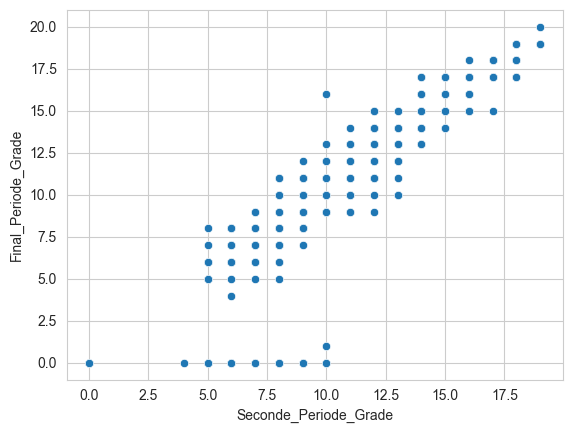

In [74]:
sns.scatterplot(x=df['Seconde_Periode_Grade'], y=df['Final_Periode_Grade'])